In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from datetime import date
import holidays

ModuleNotFoundError: No module named 'holidays'

In [56]:
# Start of cleaning the review dataset
conn = sqlite3.connect("/Users/huyguy/Documents/Documents - Huy’s MacBook Pro/UW/Clubs/AAUW/Local Files/yelp_data.db")
review_df = pd.read_sql(
    "SELECT * FROM review", conn)
business_df = pd.read_sql(
    "SELECT * FROM business", conn)
checkin_df = pd.read_sql(
    "SELECT * FROM checkin", conn)
tip_df = pd.read_sql(
    "SELECT * FROM tip", conn)
user_df = pd.read_sql(
    "SELECT * FROM user", conn)
conn.close()

## Business

In [57]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,open_days,time_span,BusinessAcceptsCreditCards,BusinessParking,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsDelivery,Parking,Parking_Category
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","['Monday', 'Tuesday', 'Wednesday', 'Thursday',...","['7:0-20:0', '7:0-20:0', '7:0-20:0', '7:0-20:0...",False,"{'garage': False, 'street': True, 'validated':...",True,1,False,1,Limited Parking
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...","['Wednesday', 'Thursday', 'Friday', 'Saturday'...","['14:0-22:0', '16:0-22:0', '12:0-22:0', '12:0-...",True,"{'garage': None, 'street': None, 'validated': ...",True,None,None,1,Limited Parking
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...","['Monday', 'Tuesday', 'Wednesday', 'Thursday',...","['0:0-0:0', '6:0-22:0', '6:0-22:0', '6:0-22:0'...",True,None,True,1,True,0,No Parking
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...","['Monday', 'Tuesday', 'Wednesday', 'Thursday',...","['0:0-0:0', '6:0-21:0', '6:0-21:0', '6:0-16:0'...",True,"{'garage': False, 'street': False, 'validated'...",True,1,True,0,No Parking
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...","['Monday', 'Tuesday', 'Wednesday', 'Thursday',...","['11:0-14:0', '11:0-14:0', '11:0-14:0', '11:0-...",None,"{'garage': False, 'street': False, 'validated'...",None,None,None,0,No Parking


In [58]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56023 entries, 0 to 56022
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 56023 non-null  object 
 1   name                        56023 non-null  object 
 2   address                     56023 non-null  object 
 3   city                        56023 non-null  object 
 4   state                       56023 non-null  object 
 5   postal_code                 56023 non-null  object 
 6   latitude                    56023 non-null  float64
 7   longitude                   56023 non-null  float64
 8   stars                       56023 non-null  float64
 9   review_count                56023 non-null  int64  
 10  attributes                  56023 non-null  object 
 11  categories                  56023 non-null  object 
 12  hours                       56023 non-null  object 
 13  open_days                   560

In [59]:
business_df[['stars', 'review_count']].describe()

,stars,review_count
count,56023.000000,56023.000000
mean,3.594131,86.001017
std,0.850839,184.565504
min,1.000000,5.000000
25%,3.000000,14.000000
50%,3.500000,34.000000
75%,4.000000,88.000000
max,5.000000,7568.000000


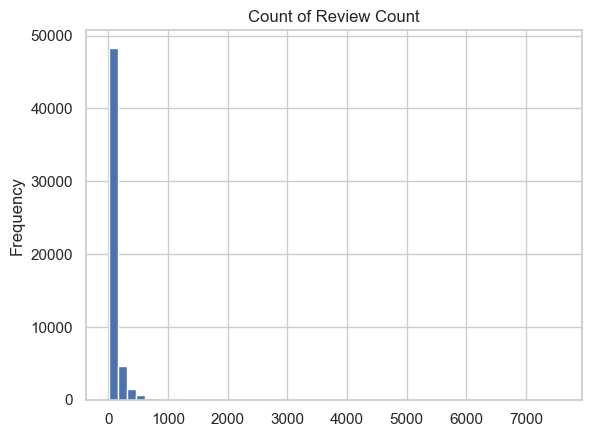

In [60]:
business_df.review_count.plot.hist(bins = 50)
plt.title("Count of Review Count");

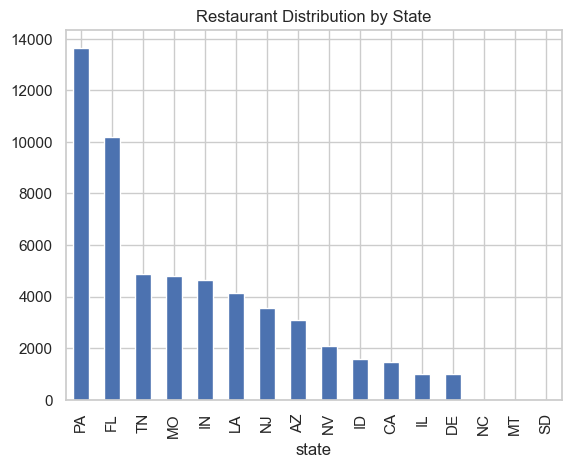

In [61]:
# Count of restaurant by state
business_df.state.value_counts().plot.bar()
plt.title('Restaurant Distribution by State')
plt.show()

In [62]:
business_df = business_df[~business_df['state'].isin(['NC', 'MT', 'SD'])]

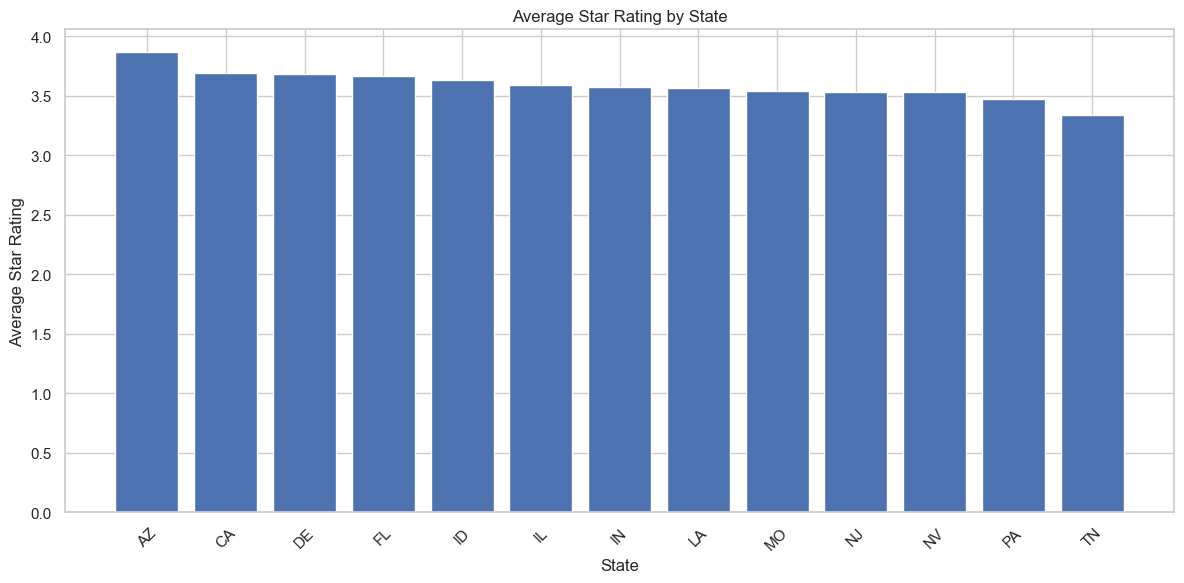

In [63]:
# Average rating by state
avg_rate = business_df.groupby('state')['stars'].mean().reset_index(name = 'average_stars')

plt.figure(figsize=(12, 6))
plt.bar(avg_rate['state'], avg_rate['average_stars'].sort_values(ascending =False))
plt.title('Average Star Rating by State')
plt.xlabel('State')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

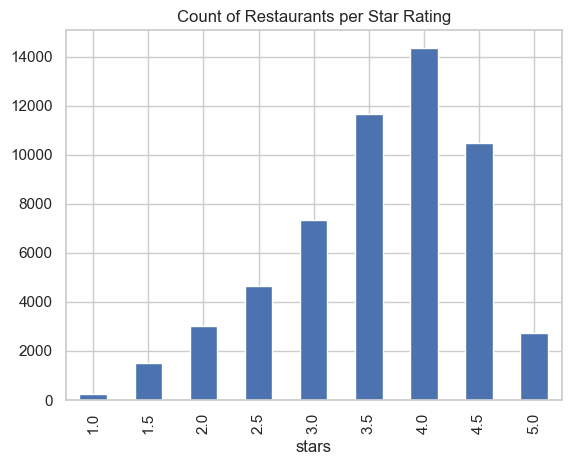

In [64]:
#Count of Restaurants per Star Rating
business_df['stars'].value_counts().sort_index().plot.bar()
plt.title("Count of Restaurants per Star Rating");

In [133]:
# # Rating and review count correlation per state
# states = business_df['state'].unique()

# # Create subplots
# fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# # Flatten the axes array for easy indexing
# axes = axes.flatten()

# # Loop over each state and plot a bar plot for rating distribution
# for i, state in enumerate(states):
#     sns.scatterplot(x=business_df[business_df['state'] == state]['review_count'], 
#                     y=business_df[business_df['state'] == state]['stars'], 
#                     ax=axes[i], alpha=0.5)
#     axes[i].set_title(f"{state}")
#     axes[i].set_xlabel('')  # Remove x-axis label
#     axes[i].set_ylabel('')  # Remove y-axis label
#     if i % 5 == 0:  # Leftmost plot in each row (first column)
#         axes[i].set_ylabel('Star Rating', fontsize=12)
#     if i // 5 == 2:  # Bottommost plot in each column (third row)
#         axes[i].set_xlabel('Restaurant Review Count', fontsize=12)
#     axes[i].set_ylim(0, 5.5)

# for j in range(13, 15):
#     fig.delaxes(axes[j])

# plt.suptitle('Hypeness', fontsize=16)
# fig.tight_layout()
# plt.show()

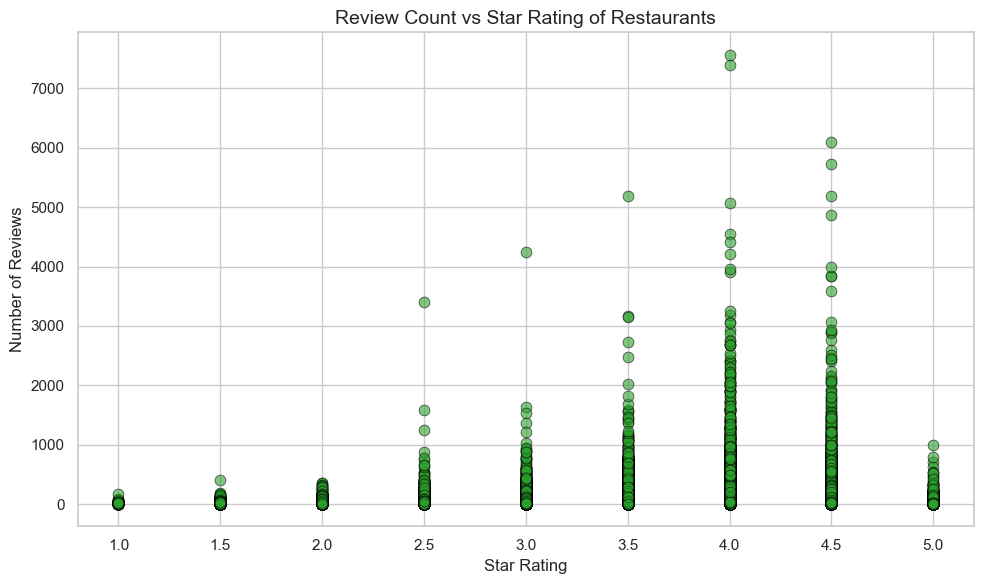

In [66]:
# Rating and review count correlation
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=business_df,
    x='stars', 
    y='review_count',
    alpha=0.6,
    s=60,
    color='#2ca02c',
    edgecolor='black'
)

# Add labels and title
plt.title('Review Count vs Star Rating of Restaurants', fontsize=14)
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

Consider adding extra weight to outliers, normalize stars, or even more flexible adjustment.

In [67]:
# Normalize review count using log scale
business_df['review_boost'] = np.log1p(business_df['review_count'])

# Weighted score = rating * log(review count)
business_df['weighted_stars'] = business_df['stars'] * business_df['review_boost']

In [68]:
min_score = business_df['weighted_stars'].min()
max_score = business_df['weighted_stars'].max()

business_df['normalized_stars'] = 5 * (business_df['weighted_stars'] - min_score) / (max_score - min_score)

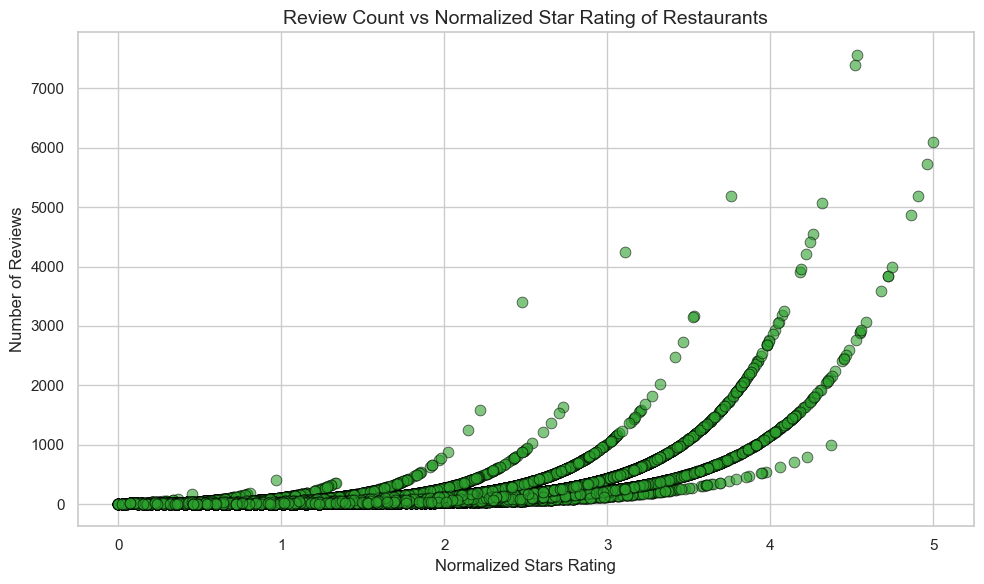

In [69]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=business_df,
    x='normalized_stars', 
    y='review_count',
    alpha=0.6,
    s=60,
    color='#2ca02c',
    edgecolor='black'
)

# Add labels and title
plt.title('Review Count vs Normalized Star Rating of Restaurants', fontsize=14)
plt.xlabel('Normalized Stars Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [70]:
# Find average star rating of cities
city_avg_rating = business_df.groupby("city")["normalized_stars"].mean().sort_values(ascending=False)
city_avg_rating.head(10)

city
East Falls                 3.302601
Bucktown                   3.156712
Palm harbor                3.072795
Clearwater/ Countryside    2.952957
Pass-a-Grille Beach        2.784856
East Nashville             2.773934
Tampa Palms                2.773694
reno                       2.731474
Abington Township          2.652544
Gwynedd Valley             2.638800
Name: normalized_stars, dtype: float64

We can use this info for trip planning. For example, if I visit NY, which cities should I stay close to for good food and other tourist attractions.

In [71]:
# # Bayesian average formula (account for low restaurant count with high rating)
# def bayesian_average(stars, count, global_avg, smoothing_factor):
#     return (stars + global_avg * smoothing_factor) / (count + smoothing_factor)
    
#     """
#     Calculate the Bayesian Average Rating for a city.

#     Formula:
#     Bayesian Average = (sum of ratings for city + (global average * smoothing factor)) / 
#                       (number of restaurants in city + smoothing factor)

#     Parameters:
#     - ratings: The series of ratings for the city.
#     - count: The number of restaurants in the city.
#     - global_avg: The global average rating across all cities.
#     - smoothing_factor: The smoothing factor applied to the formula to prevent bias towards cities with few restaurants.

#     Returns:
#     - The Bayesian average rating for the city.
#     """

In [72]:
# # Global average rating across all restaurants
# global_avg = business_df['stars'].mean()
# smoothing_factor = 20  # Tune this

# # Now calculate the Bayesian average
# business_df['bayesian_stars'] = business_df.apply(
#     lambda row: bayesian_average(row['stars'], row['review_count'], global_avg, smoothing_factor),
#     axis=1
# )

In [73]:
# # Calculate the Bayesian average for each business
# city_counts = business_df['city'].value_counts()
# global_avg = business_df['stars'].mean()
# smoothing_factor = 10 # Experiment with this, bigger number means cities with low res counts will be closer to glob_avg

# bayesian_avg_city_ratings = business_df.groupby('city').apply(
#     lambda x: bayesian_average(x['stars'].sum(), city_counts[x.name], global_avg, smoothing_factor)
# )

# # Sort the cities by Bayesian average rating in descending order
# city_rating_sorted = bayesian_avg_city_ratings.sort_values(ascending=False)
# city_rating_sorted

In [74]:
business_df.sort_values(by='normalized_stars', ascending=False).head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessAcceptsCreditCards,BusinessParking,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsDelivery,Parking,Parking_Category,review_boost,weighted_stars,normalized_stars
34123,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,...,True,"{'garage': False, 'street': True, 'validated':...",True,2,True,1,Limited Parking,8.715060,39.217770,5.000000
53300,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,...,True,"{'garage': True, 'street': True, 'validated': ...",True,2,True,4,Excellent Parking,8.652074,38.934332,4.962134
54779,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,...,True,"{'garage': False, 'street': True, 'validated':...",True,2,True,1,Limited Parking,8.555259,38.498667,4.903930
11696,_C7QiQQc47AOEv4PE3Kong,Commander's Palace,1403 Washington Ave,New Orleans,LA,70130,29.928735,-90.084196,4.5,4876,...,True,"{'garage': False, 'street': True, 'validated':...",True,3,None,2,Limited Parking,8.492286,38.215285,4.866071
49355,I_3LMZ_1m2mzR0oLIOePIg,Pappy's Smokehouse,3106 Olive St,Saint Louis,MO,63103,38.635147,-90.224003,4.5,3999,...,True,"{'garage': False, 'street': True, 'validated':...",True,2,True,2,Limited Parking,8.294050,37.323223,4.746894


A con of normalizing this way is that we might not be able to show the final rating of restaurants, because the normalized rating do not reflect true sentiment of the reviewers but rather weighting the stars. Ranking the restaurants seems to be fine.

In [75]:
business_df['categories'].apply(len).mean()

np.float64(57.076597643698676)

In [76]:
business_df['categories'].head()

0    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
1                            Brewpubs, Breweries, Food
2    Burgers, Fast Food, Sandwiches, Food, Ice Crea...
3    Ice Cream & Frozen Yogurt, Fast Food, Burgers,...
4           Vietnamese, Food, Restaurants, Food Trucks
Name: categories, dtype: object

In [77]:
# Find every possible category
unique_categories = []
for categories_list in business_df['categories']:
    categories_list = [word.strip() for word in categories_list.split(',')]
    for category in categories_list:
        if category not in unique_categories:
            unique_categories.append(category)

In [78]:
unique_categories

['Restaurants',
 'Food',
 'Bubble Tea',
 'Coffee & Tea',
 'Bakeries',
 'Brewpubs',
 'Breweries',
 'Burgers',
 'Fast Food',
 'Sandwiches',
 'Ice Cream & Frozen Yogurt',
 'Vietnamese',
 'Food Trucks',
 'American (Traditional)',
 'Diners',
 'Breakfast & Brunch',
 'Delis',
 'Italian',
 'Sushi Bars',
 'Japanese',
 'Korean',
 'Steakhouses',
 'Asian Fusion',
 'Seafood',
 'Cocktail Bars',
 'Bars',
 'Nightlife',
 'Pizza',
 'Chicken Wings',
 'Salad',
 'Soup',
 'Eatertainment',
 'Arts & Entertainment',
 'Specialty Food',
 'Pasta Shops',
 'Chinese',
 'Wine Bars',
 'Event Planning & Services',
 'Caterers',
 'Cafes',
 'Vitamins & Supplements',
 'Juice Bars & Smoothies',
 'Shopping',
 'American (New)',
 'Sports Bars',
 'Chocolatiers & Shops',
 'Candy Stores',
 'Beer Bar',
 'Grocery',
 'Lounges',
 'Wraps',
 'Beer',
 'Wine & Spirits',
 'Automotive',
 'Gas Stations',
 'Convenience Stores',
 'Pubs',
 'Gastropubs',
 'Venues & Event Spaces',
 'Fruits & Veggies',
 'Sporting Goods',
 'Sports Wear',
 'Fashion

In [79]:
# Food & Drink categories
# Filtered by Chat and Claude
restaurant_categories = {
    "general_food": [
        "Restaurants", "Food", "Food Trucks", "Food Stands", "Food Court", 
        "Food Tours", "Food Delivery Services", "Food Banks", "Ethnic Food",
        "Live/Raw Food", "Do-It-Yourself Food", "Comfort Food", "Street Vendors",
        "Local Flavor", "Imported Food", "International", "Eatertainment"
    ],
    
    "cuisine": [
        "Vietnamese", "American (Traditional)", "American (New)", "Italian", "Japanese", 
        "Korean", "Asian Fusion", "Chinese", "Filipino", "Mexican", "Barbeque", "Thai", 
        "Hawaiian", "Southern", "Soul Food", "Caribbean", "Trinidadian", "Tex-Mex", 
        "Latin American", "Pakistani", "Indian", "Halal", "Greek", "Puerto Rican", 
        "Honduran", "Spanish", "African", "Turkish", "Middle Eastern", "Lebanese", 
        "Falafel", "Malaysian", "Burmese", "Cuban", "Sicilian", "Sardinian", "Laotian", 
        "Szechuan", "Dominican", "Ethiopian", "Persian/Iranian", "Taiwanese", 
        "New Mexican Cuisine", "Oriental", "German", "Arabic", "Argentine", "Portuguese", 
        "Kosher", "Cantonese", "Salvadoran", "Mongolian", "British", "Syrian", "Armenian", 
        "Venezuelan", "Colombian", "Brazilian", "Haitian", "Russian", "Czech", 
        "Himalayan/Nepalese", "Polish", "Hainan", "Cambodian", "Afghan", "Indonesian", 
        "Senegalese", "Tuscan", "Shanghainese", "Austrian", "Basque", "Australian", 
        "Iberian", "Japanese Curry", "Fondue", "Izakaya", "Nicaraguan", "Bangladeshi", 
        "Scottish", "Belgian", "Lahmacun", "Egyptian", "Uzbek", "Scandinavian", 
        "Israeli", "Georgian", "Ukrainian", "Fuzhou", "South African", "Roman", 
        "Hungarian", "Tonkatsu", "Donburi", "Eastern European", "Somali", "Cucina campana", 
        "Serbo Croatian", "Cajun/Creole", "French", "Moroccan", "Mediterranean",
        "Hong Kong Style Cafe", "Pan Asian", "Modern European", "International"
    ],
    
    "specific_food": [
        "Bubble Tea", "Coffee & Tea", "Bakeries", "Burgers", "Fast Food", "Sandwiches", 
        "Ice Cream & Frozen Yogurt", "Sushi Bars", "Steakhouses", "Seafood", "Pizza", 
        "Chicken Wings", "Salad", "Soup", "Pasta Shops", "Juice Bars & Smoothies", 
        "Chocolatiers & Shops", "Candy Stores", "Wraps", "Fruits & Veggies", "Custom Cakes", 
        "Desserts", "Cupcakes", "Patisserie/Cake Shop", "Shaved Ice", "Chicken Shop", 
        "Bagels", "Donuts", "Tacos", "Ramen", "Noodles", "Cheesesteaks", "Kebab", 
        "Gelato", "Creperies", "Poke", "Pretzels", "Fish & Chips", "Dim Sum", "Waffles", 
        "Popcorn Shops", "Smokehouse", "Hot Pot", "Macarons", "Empanadas", "Acai Bowls", 
        "Pancakes", "Pita", "Poutineries", "Delicatessen", "Conveyor Belt Sushi",
        "Cheese Shops", "Olive Oil", "Honey", "Shaved Snow", "Hot Dogs"
    ],
    
    "beverages": [
        "Brewpubs", "Breweries", "Cocktail Bars", "Bars", "Wine Bars", "Beer Bar", 
        "Beer", "Wine & Spirits", "Beer Gardens", "Juice Bars & Smoothies", "Coffee Roasteries", 
        "Tea Rooms", "Kombucha", "Wine Tasting Room", "Tiki Bars", "Whiskey Bars", 
        "Champagne Bars", "Drive-Thru Bars", "Vermouth Bars", "Beer Hall", "Hotel bar", 
        "Beach Bars", "Cideries", "Breweries", "Distilleries", "Wineries", "Meaderies",
        "Coffeeshops", "Wine Tasting Classes", "Beverage Store"
    ],
    
    "venue_type": [
        "Diners", "Breakfast & Brunch", "Delis", "Cafes", "Sports Bars", "Pubs", 
        "Gastropubs", "Lounges", "Buffets", "Specialty Food", "Food Court", "Tapas Bars", 
        "Tapas/Small Plates", "Themed Cafes", "Food Stands", "Pop-Up Restaurants", 
        "Cafeteria", "Supper Clubs", "Parent Cafes", "Bistros", "Brasseries",
        "Internet Cafes", "Kiosk"
    ],
    
    "dietary_focus": [
        "Vegan", "Vegetarian", "Gluten-Free", "Organic Stores", "Health Markets",
        "Ethical Grocery"
    ],
    
    "market_related": [
        "Farmers Market", "Seafood Markets", "International Grocery", "Meat Shops",
        "Butcher", "Ethnic Grocery", "Public Markets", "CSA", "Herbs & Spices"
    ]
}

More comprehensive tags we can use for filtering. 

In [139]:
# Explode category list
business_df['category'] = business_df['categories'].str.split(', ')
category_exploded = business_df.explode('category')

In [148]:
top_categories = (
    category_exploded['category']
    .value_counts()
    .head(30)  # Or more
    .reset_index()
    .rename(columns={'index': 'category', 'category_list': 'count'})
)

In [149]:
top_categories

,category,count
0,Restaurants,42689
1,Food,22915
2,Nightlife,9880
3,Bars,9481
4,Sandwiches,7445
5,American (Traditional),7249
6,Coffee & Tea,5891
7,Pizza,5751
8,Fast Food,5699
9,Breakfast & Brunch,5674


In [80]:
business_df.RestaurantsPriceRange2.value_counts()

RestaurantsPriceRange2
2       25322
1       20457
None     8242
3        1777
4         222
Name: count, dtype: int64

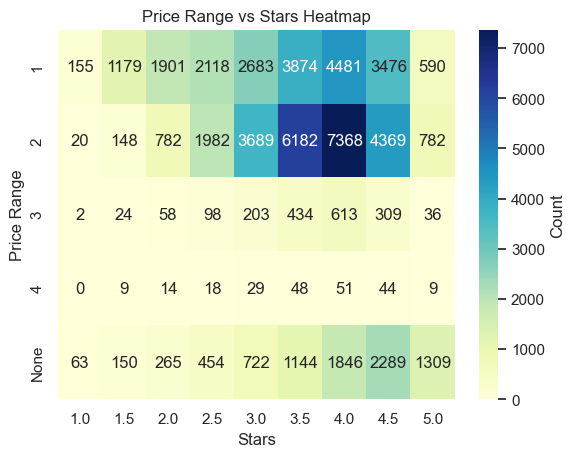

In [81]:
# Price range vs rating
crosstab = pd.crosstab(business_df['RestaurantsPriceRange2'], business_df['stars'])

# Plot heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title("Price Range vs Stars Heatmap")
plt.xlabel("Stars")
plt.ylabel("Price Range")
plt.show()

Most restaurants are around 3 to 4.5 stars and range between 1 to 2. We can use this information to strengthen our measure of the value per dollar metric. Some thing like this: value = star * food value sentiment / price range. 

#### Still need to consider what to do with "None" value

## Check in

In [82]:
checkin_df.date[1]

'2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011-07-18 22:30:31, 2012-09-07 20:28:50, 2013-03-27 15:57:36, 2013-08-13 00:31:34, 2013-08-13 00:31:48, 2013-09-23 17:39:38, 2013-11-18 06:34:08, 2014-04-12 23:04:47'

In [83]:
checkin_df['date'] = checkin_df['date'].apply(lambda x: x.split(', '))
checkin_df.rename(columns={'date': 'time'}, inplace=True)

In [84]:
checkin_df = checkin_df.explode('time')

In [85]:
checkin_df['time'] = pd.to_datetime(checkin_df['time'])

In [86]:
# Add date, at_time of check in, and weekday columns
checkin_df['date'] = checkin_df['time'].dt.date
checkin_df['at_time'] = checkin_df['time'].dt.time
checkin_df['weekday'] = checkin_df['time'].dt.day_name()
checkin_df['hour'] = checkin_df['time'].dt.hour
checkin_df['year'] = checkin_df['time'].dt.year
checkin_df['month'] = checkin_df['time'].dt.to_period('M')

In [87]:
# Add more detail to time: BF, Lunch, DN
def categorize_time(dt):
    hour = dt.hour
    if 5 <= hour < 11:
        return 'Breakfast'
    elif 11 <= hour < 15:
        return 'Lunch'
    elif 15 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Dinner'
    elif 21 <= hour < 24:
        return 'Evening'
    else:
        return 'Late Night'

checkin_df['time_category'] = checkin_df['at_time'].apply(categorize_time)

In [88]:
# Define a function to determine season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

checkin_df['season'] = checkin_df['time'].apply(get_season)

In [89]:
checkin_df.head(20)

,business_id,time,date,at_time,weekday,hour,year,month,time_category,season
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,2020-03-13,21:10:56,Friday,21,2020,2020-03,Evening,Spring
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06,2020-06-02,22:18:06,Tuesday,22,2020,2020-06,Evening,Summer
0,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27,2020-07-24,22:42:27,Friday,22,2020,2020-07,Evening,Summer
0,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13,2020-10-24,21:36:13,Saturday,21,2020,2020-10,Evening,Fall
0,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33,2020-12-09,21:23:33,Wednesday,21,2020,2020-12,Evening,Winter
0,---kPU91CF4Lq2-WlRu9Lw,2021-01-20 17:34:57,2021-01-20,17:34:57,Wednesday,17,2021,2021-01,Afternoon,Winter
0,---kPU91CF4Lq2-WlRu9Lw,2021-04-30 21:02:03,2021-04-30,21:02:03,Friday,21,2021,2021-04,Evening,Spring
0,---kPU91CF4Lq2-WlRu9Lw,2021-05-25 21:16:54,2021-05-25,21:16:54,Tuesday,21,2021,2021-05,Evening,Spring
0,---kPU91CF4Lq2-WlRu9Lw,2021-08-06 21:08:08,2021-08-06,21:08:08,Friday,21,2021,2021-08,Evening,Summer
0,---kPU91CF4Lq2-WlRu9Lw,2021-10-02 15:15:42,2021-10-02,15:15:42,Saturday,15,2021,2021-10,Afternoon,Fall


We can provide crowdness level as additional info for user. For example, I wanna try this restaurant, when should I go?

In [90]:
# Example of a randomly select a business_id
random_id = checkin_df['business_id'].sample(n=1).iloc[0]
filtered_df = checkin_df[checkin_df['business_id'] == random_id]

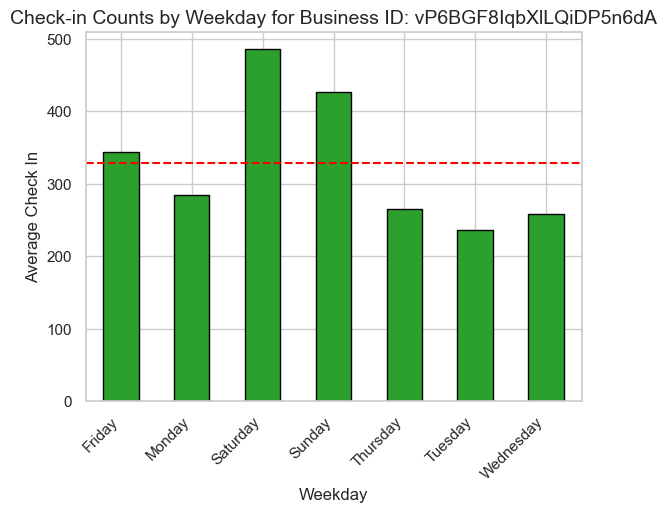

In [91]:
# Count check-ins per weekday
grouped = filtered_df.groupby(['weekday', 'business_id']).size().reset_index(name='checkin_count')

# Average check-in count for each weekday
weekday_avg = grouped.groupby('weekday')['checkin_count'].mean()

# Average check-in count for all weekday
overall_avg = weekday_avg.mean()

weekday_avg.plot.bar(color='#2ca02c', edgecolor='black')
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {overall_avg:.2f}')
plt.title(f"Check-in Counts by Weekday for Business ID: {random_id}", fontsize=14)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Average Check In", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

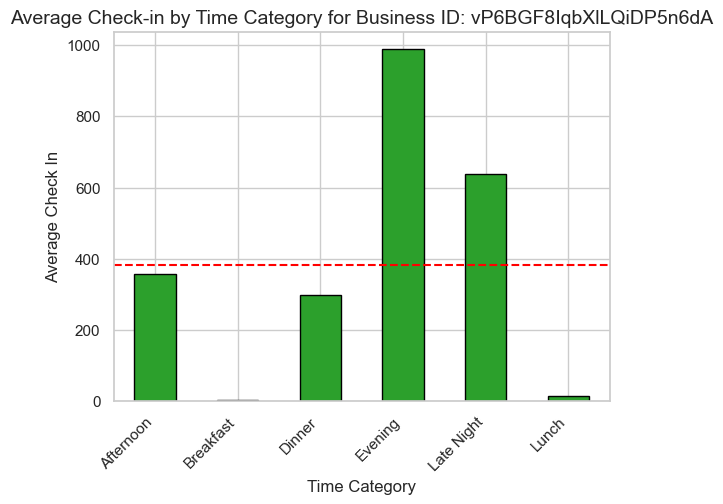

In [92]:
# Count check-ins per time category
grouped = filtered_df.groupby(['time_category', 'business_id']).size().reset_index(name='checkin_count')

# Average check-in count for each category
time_category_avg = grouped.groupby('time_category')['checkin_count'].mean()

# Average check-in count for all category
overall_avg = time_category_avg.mean()

time_category_avg.plot.bar(color='#2ca02c', edgecolor='black')
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {overall_avg:.2f}')
plt.title(f"Average Check-in by Time Category for Business ID: {random_id}", fontsize=14)
plt.xlabel("Time Category", fontsize=12)
plt.ylabel("Average Check In", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

Consider making a heatmap instead for better user experience. Like the terrible example below. 

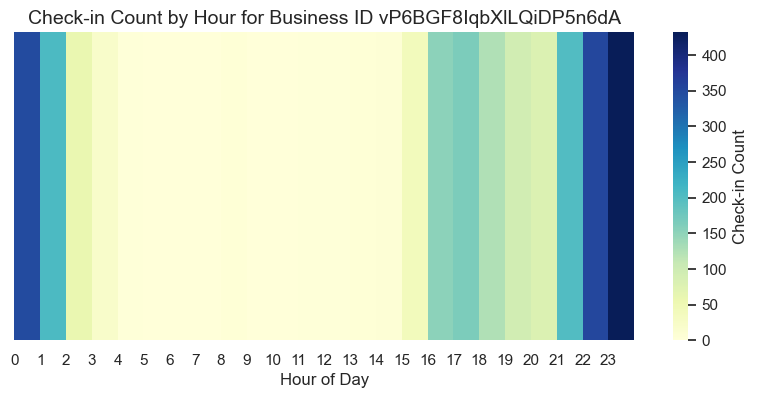

In [93]:
# Count check-ins per hour
hourly_counts = filtered_df.groupby('hour').size().reindex(range(24), fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(hourly_counts.values.reshape(1, -1), cmap='YlGnBu', cbar_kws={'label': 'Check-in Count'})

plt.title(f"Check-in Count by Hour for Business ID {random_id}", fontsize=14)
plt.xlabel("Hour of Day")
plt.yticks([])
plt.xticks(ticks=range(24), labels=range(24))
plt.show()

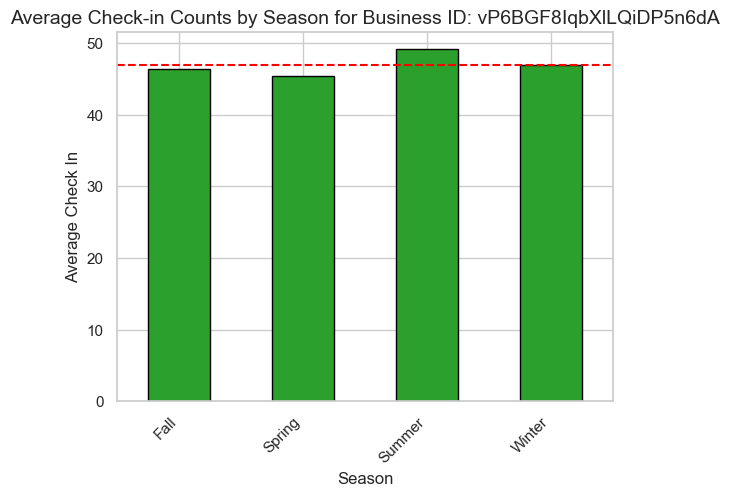

In [94]:
# Count check-ins per season per year
grouped_season_year = filtered_df.groupby(['season', 'year', 'business_id']).size().reset_index(name='checkin_count')

# Calculate the average check-in count for each season across all years
season_avg = grouped_season_year.groupby('season')['checkin_count'].mean()

# Average check-in count for all weekday
overall_avg = season_avg.mean()

season_avg.plot.bar(color='#2ca02c', edgecolor='black')
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {overall_avg:.2f}')
plt.title(f"Average Check-in Counts by Season for Business ID: {random_id}", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Check In", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

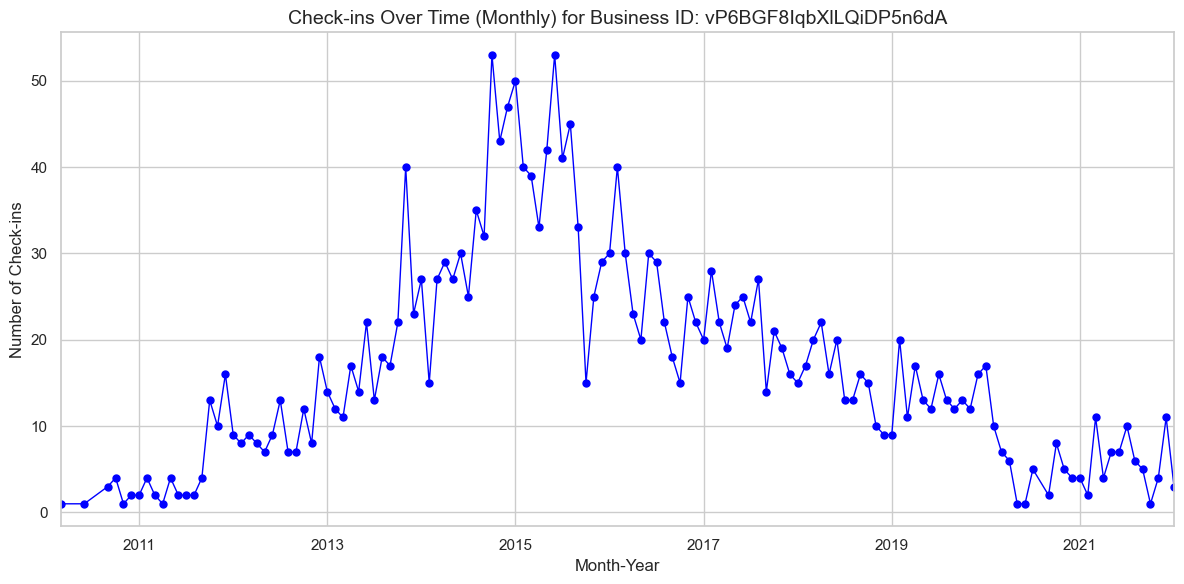

In [95]:
# Check in overtime 
# Group by 'month'
monthly_checkins = filtered_df.groupby('month').size()

plt.figure(figsize=(12, 6))
monthly_checkins.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=1, markersize=5)

# Adding title and labels
plt.title(f"Check-ins Over Time (Monthly) for Business ID: {random_id}", fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Check-ins', fontsize=12)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

Overall, we can either use this as additional info, or filtering. For filtering, we can allow users to choose what time they want to visit. For example, I want to visit Pennsylvania for the Winter and I have a preference for the restaurants that are currently on the top of the list that I want extra emphasis on those that are more busy in the Winter, maybe because they specialize in catering to Christmas season. If filtering, I think it would be better to find some sort of comparison, like percentage. If it is 30% more busier, then I will give it a higher rating. Could this be a way to find niche spots?

In [ ]:
# U.S. holidays dictionary for a given year range
us_holidays = holidays.UnitedStates(years=range(2015, 2025))

## User

In [96]:
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [97]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [98]:
user_df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


## Review

In [99]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_score,stopwords_removed,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0.0,decide eat aware going hours beginning end tri...,0.6705,0.670500,0.948936,0.670500
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,0.8,Wow Yummy different delicious favorite lamb cu...,0.9509,0.960567,0.795800,0.795800
2,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,0.8,Cute interior owner gave tour upcoming patio r...,0.9766,0.976600,0.976600,0.976600
3,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,1.2,long term frequent customer establishment went...,-0.5031,0.585900,0.415359,-0.884950
4,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2.0,0.0,0.0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,1.2,Amazingly amazing wings homemade bleu cheese r...,0.9706,0.946533,0.989309,0.972929


In [109]:
avg_sentiment_per_business = review_df.groupby('business_id')[[
    'food_sentiment', 'service_sentiment', 'ambience_sentiment', 'value_sentiment'
]].mean().reset_index()
avg_sentiment_per_business

,business_id,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment
0,---kPU91CF4Lq2-WlRu9Lw,0.891467,0.873489,0.884859,0.837274
1,--8IbOsAAxjKRoYsBFL-PA,0.427139,0.504730,0.644738,0.503452
2,--ARBQr1WMsTWiwOKOj-FQ,0.867209,0.883398,0.887614,0.907637
3,--MbOh2O1pATkXa7xbU6LA,0.840131,0.867939,0.830235,0.833561
4,--SJXpAa0E-GCp2smaHf0A,0.314131,0.550840,0.394833,0.486864
...,...,...,...,...,...
56018,zziDpuuJw-Km1J4BaGpBKA,0.828214,0.750878,0.933638,0.858597
56019,zzjFdJwXuxBOGe9JeY_EMw,0.692803,0.740312,0.830993,0.716342
56020,zznJox6-nmXlGYNWgTDwQQ,0.183715,0.111316,0.412374,0.215879
56021,zznZqH9CiAznbkV6fXyHWA,0.861200,0.939176,0.955859,0.965694


In [110]:
# Merge average sentiments to business_df
business_df = business_df.merge(
    avg_sentiment_per_business,
    on='business_id',
    how='left'  # use 'left' to keep all businesses, even those without sentiment scores
)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsDelivery,Parking,Parking_Category,review_boost,weighted_stars,normalized_stars,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,1,Limited Parking,4.394449,17.577797,2.108966,0.847234,0.794418,0.905108,0.823963
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,None,1,Limited Parking,2.639057,11.875758,1.347191,0.909808,0.878582,0.887428,0.816136
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,True,0,No Parking,1.945910,3.891820,0.280562,0.284464,0.462488,-0.020545,0.112409
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,True,0,No Parking,2.397895,3.596843,0.241154,0.357012,0.332773,0.535849,0.183233
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,None,0,No Parking,2.397895,9.591581,1.042032,0.771255,0.892830,0.834104,0.710922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56015,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,True,1,Limited Parking,2.484907,7.454720,0.756554,0.671871,0.690816,0.740184,0.776029
56016,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,...,False,1,Limited Parking,3.526361,14.105442,1.645070,0.591160,0.533516,0.653233,0.557195
56017,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,False,1,Limited Parking,3.737670,16.819513,2.007662,0.875671,0.845262,0.884879,0.833314
56018,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,True,1,Limited Parking,3.583519,16.125835,1.914988,0.833441,0.864632,0.890308,0.816152


In [111]:
business_df[['stars', 'food_sentiment', 'service_sentiment', 'ambience_sentiment', 'value_sentiment']].corr()

,stars,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment
stars,1.000000,0.861396,0.869967,0.848896,0.858871
food_sentiment,0.861396,1.000000,0.928434,0.856712,0.907371
service_sentiment,0.869967,0.928434,1.000000,0.868518,0.913080
ambience_sentiment,0.848896,0.856712,0.868518,1.000000,0.854201
value_sentiment,0.858871,0.907371,0.913080,0.854201,1.000000


No outstanding correlation. They do matches are proportional with star rating, which is good. We can use these correlation to find the right weighting for the composition of the avereage score. Or we can use PCA. 

In [112]:
weights = {
    'food_sentiment':    0.861,
    'service_sentiment': 0.870,
    'ambience_sentiment':0.849,
    'value_sentiment':   0.859
}

# Normalize weights
total = sum(weights.values())
norm_weights = {k: v / total for k, v in weights.items()}
norm_weights

{'food_sentiment': 0.2503634777551614,
 'service_sentiment': 0.2529805175923233,
 'ambience_sentiment': 0.24687409130561208,
 'value_sentiment': 0.24978191334690317}

In [113]:
business_df['composite_sentiment'] = (
    0.250 * business_df['food_sentiment'] +
    0.253 * business_df['service_sentiment'] +
    0.247 * business_df['ambience_sentiment'] +
    0.250 * business_df['value_sentiment']
)

In [116]:
review_df.describe()

,stars,useful,funny,cool,review_score,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment,time,year
count,4.988734e+06,4.988734e+06,4.988734e+06,4.988734e+06,4.988733e+06,4.988734e+06,4.988734e+06,4.988734e+06,4.988734e+06,4988733,4.988733e+06
mean,3.820674e+00,1.012168e+00,3.142242e-01,5.026251e-01,7.706705e-01,7.527301e-01,7.598483e-01,8.101609e-01,7.714440e-01,2017-01-09 23:24:27.088676864,2.016533e+03
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-9.993000e-01,-9.994000e-01,-9.993000e-01,-9.994000e-01,2005-02-16 03:23:22,2.005000e+03
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.906000e-01,8.165000e-01,8.519364e-01,8.020000e-01,2015-01-25 22:27:14,2.015000e+03
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.296500e-01,9.366750e-01,9.442500e-01,9.332556e-01,2017-06-02 13:33:25,2.017000e+03
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.000000e-01,9.710000e-01,9.723000e-01,9.741667e-01,9.716000e-01,2019-05-18 17:45:01,2.019000e+03
max,5.000000e+00,4.200000e+02,7.920000e+02,4.040000e+02,3.232000e+02,9.998000e-01,9.998000e-01,9.998000e-01,9.998000e-01,2022-01-19 19:48:25,2.022000e+03
std,1.388654e+00,2.796857e+00,1.736747e+00,2.213661e+00,2.283484e+00,4.218862e-01,4.270568e-01,3.477847e-01,3.917072e-01,NaN,3.070605e+00


In [100]:
#'date' column is datetime
review_df['time'] = pd.to_datetime(review_df['date'])

# Extract components
review_df['date'] = review_df['time'].dt.date
review_df['at_time'] = review_df['time'].dt.time   
review_df['weekday'] = review_df['time'].dt.day_name()
review_df['year'] = review_df['time'].dt.year
review_df['month'] = review_df['time'].dt.to_period('M')

In [101]:
review_df['time_category'] = review_df['at_time'].apply(categorize_time)
review_df['season'] = review_df['time'].apply(get_season)

In [103]:
# Example of a randomly select a business_id
random_id = review_df['business_id'].sample(n=1).iloc[0]
filtered_df = review_df[review_df['business_id'] == random_id]

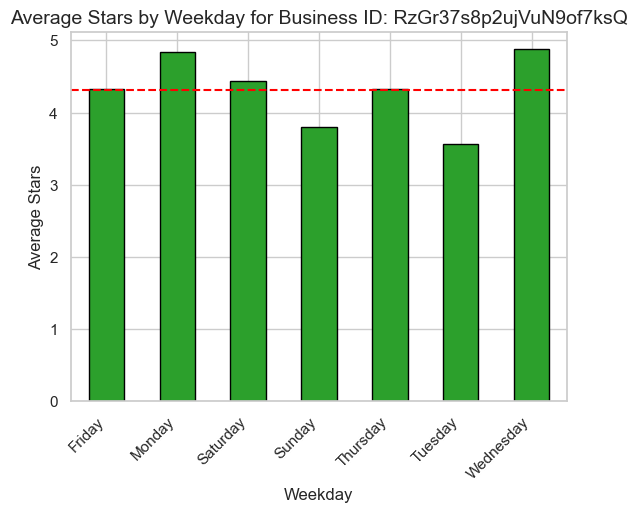

In [104]:
# Average rating per weekday
grouped = filtered_df.groupby(['weekday', 'business_id'])['stars'].mean().reset_index(name='stars')

# Average check-in count for each weekday
weekday_avg = grouped.groupby('weekday')['stars'].mean()

# Average check-in count for all weekday
overall_avg = weekday_avg.mean()

weekday_avg.plot.bar(color='#2ca02c', edgecolor='black')
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {overall_avg:.2f}')
plt.title(f"Average Stars by Weekday for Business ID: {random_id}", fontsize=14)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Average Stars", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Should we add a confidence interval? n may be small, but having one can improve judement. 

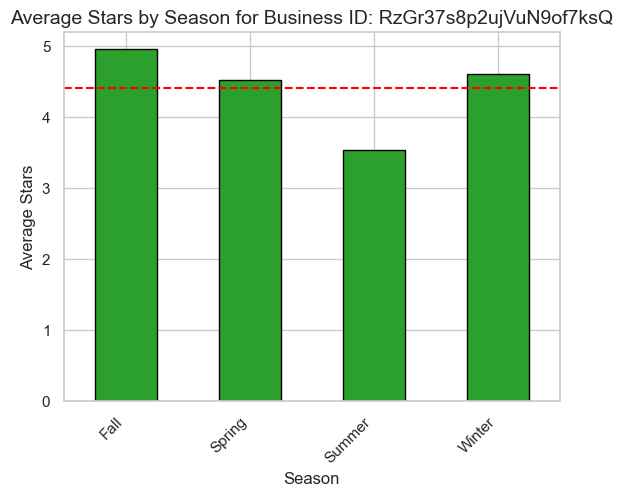

In [105]:
# Average rating per season per year
grouped_season_year = filtered_df.groupby(['season', 'year', 'business_id'])['stars'].mean().reset_index(name='stars')

# Calculate the average stars for each season across all years
season_avg = grouped_season_year.groupby('season')['stars'].mean()

# Average stars for each season across all years
overall_avg = season_avg.mean()

season_avg.plot.bar(color='#2ca02c', edgecolor='black')
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {overall_avg:.2f}')
plt.title(f"Average Stars by Season for Business ID: {random_id}", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Stars", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Again should we add interval?

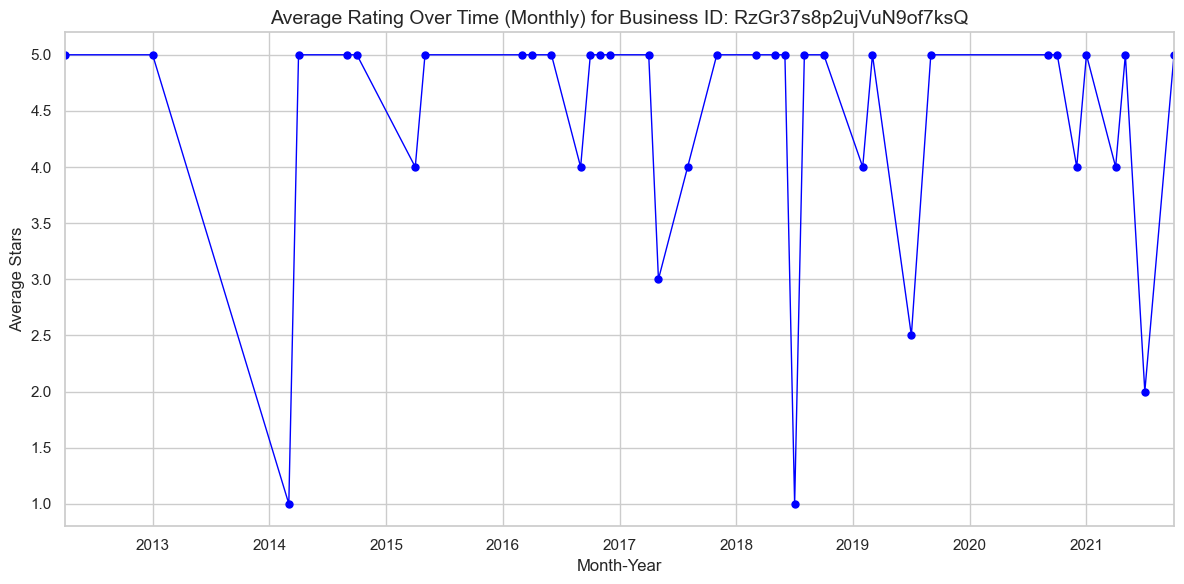

In [106]:
# Check in overtime 
# Group by 'month'
monthly_checkins = filtered_df.groupby('month')["stars"].mean()

plt.figure(figsize=(12, 6))
monthly_checkins.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=1, markersize=5)

# Adding title and labels
plt.title(f"Average Rating Over Time (Monthly) for Business ID: {random_id}", fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Stars', fontsize=12)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

Something like this can help us decide whether the restaurant is doing well or not. May consider changing the period to smooth out the movement.

In [120]:
business_df.RestaurantsPriceRange2.value_counts()

RestaurantsPriceRange2
2       25322
1       20457
None     8242
3        1777
4         222
Name: count, dtype: int64

In [128]:
# Value per dollar sign
def value_category(row):
    if row['RestaurantsPriceRange2'] != "None":
        price_range = int(row['RestaurantsPriceRange2'])
    else:
        return np.nan  # Return NaN if 'RestaurantsPriceRange2' is None

    if price_range <= 2:
        if row['value_sentiment'] >= 0.8:
            return 4  # Great Deal
        elif row['value_sentiment'] >= 0.6:
            return 5  # Good Value
        else:
            return 6  # Below Average Value
    elif price_range >= 3:
        if row['value_sentiment'] >= 0.8:
            return 3  # Fair Price
        elif row['value_sentiment'] >= 0.5:
            return 2  # Average Price
        else:
            return 1  # Overpriced
    return np.nan

business_df['value_dollar'] = business_df.apply(value_category, axis=1)

Maybe switch to a better rating.

In [131]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,review_boost,weighted_stars,normalized_stars,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment,composite_sentiment,value_category,value_dollar
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,4.394449,17.577797,2.108966,0.847234,0.794418,0.905108,0.823963,0.842349,4.0,4.0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,2.639057,11.875758,1.347191,0.909808,0.878582,0.887428,0.816136,0.872962,NaN,NaN
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,1.945910,3.891820,0.280562,0.284464,0.462488,-0.020545,0.112409,0.211153,6.0,6.0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,2.397895,3.596843,0.241154,0.357012,0.332773,0.535849,0.183233,0.351607,6.0,6.0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,2.397895,9.591581,1.042032,0.771255,0.892830,0.834104,0.710922,0.802454,NaN,NaN


Do we need to normalize the sentiments like we did with stars?

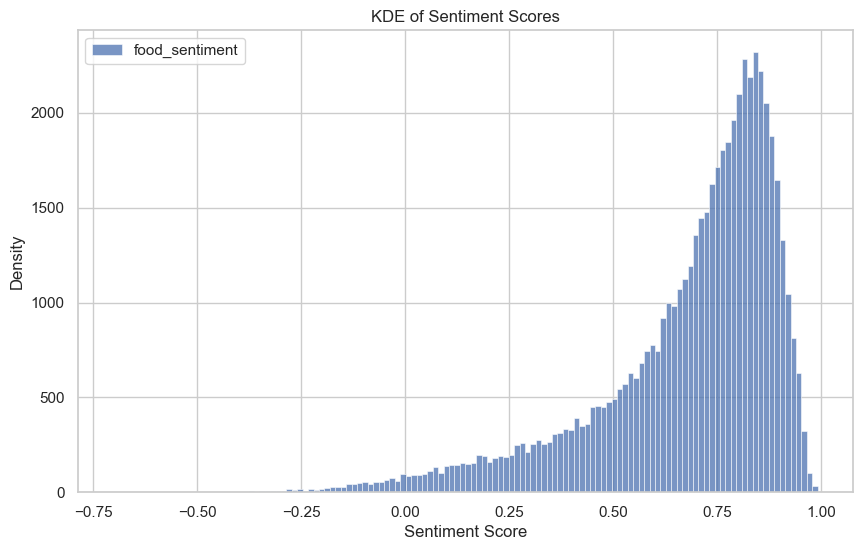

In [152]:
sentiments = ['food_sentiment']

plt.figure(figsize=(10, 6))
for sentiment in sentiments:
    sns.histplot(business_df[sentiment], label=sentiment)

plt.title('KDE of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

average sentiments and stars